# Multi-Class Classification

### Logistic Regression
We would be applying logistic regression to a classification involving more than one class using the ones vs all method which involves training a seperate classfier for every class with respect to the full training set.
In this exercise, we would be applying this in handwritten digit recognition. The dataset consist of pixel intensity matrix for a training set of 5000 examples each consisting of a seperate hand written digit.

In [248]:
import numpy as np
import scipy.io as sio
from scipy import optimize
from math import sqrt
from matplotlib import pyplot as plt

In [191]:
data = sio.loadmat('ex3data1.mat')
X = data['X']
y = data['y']
X.shape

(5000, 400)

There are 400 features here, i.e a single training example contains 20 by 20 pixels such that each feature contains the grey scale intensity of that point in floating points. Using logistic regression with a linear model.

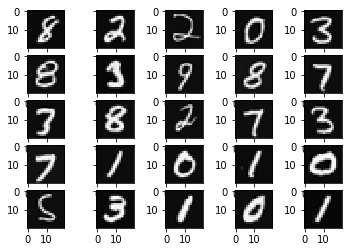

In [304]:
f, ax = plt.subplots(5,5)
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(X[np.random.randint(1, 5000)].reshape([20,20]).T, cmap = 'gray')

plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 1]], visible=False)
plt.show()

In [20]:
# Add the constant element

X = np.hstack(((np.ones([X.shape[0],1])), X))

(5000, 401)

In [106]:
# Reshape the labels into a Matrix of 0 and 1 based on the class

Y = np.zeros((y.shape[0], 10))

for i,j in enumerate(y):
    Y[i,(j-1)] = 1

# This result in a class label Matrix Y which would be used for our ones vs all classification

In [129]:
def sigmoid(x):
    '''
    input: a value or an array of values.
    Returns: The output of the sigmoid function operated on the input value.
    '''
    
    return 1/(1 + np.exp(-x))

def cost_reg(theta, X, y, lambd):
    '''
    Inputs: 
    theta - The parameter vector for the decision boundary.
    X - The feature matrix for the features.
    y - The labels corresponding to the features.
    lambd - Regularization coefficient
    
    Returns: The cost
    '''
    theta = theta.reshape((theta.shape[0],1))
    m = len(y)
    h = sigmoid(np.matmul(X, theta))
    cost = (1/m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    cost += (lambd/(2*m)) * np.power(theta,2) #this takes into account the regularization term, thus increasing the cost or penalty for the selected parameters
    return cost

def grad_reg(theta, X, y, lambd):
    '''
    theta - The parameter vector for the decision boundary.
    X - The feature matrix for the features.
    y - The labels corresponding to the features.
    lambd - Regularization coefficient
    
    Returns: The gradient or differential values corresponding to the theta parameters.
    '''
    theta = theta.reshape((theta.shape[0],1))
    m = len(y)
    h = sigmoid(np.matmul(X, theta))
    grad = (1/m) * sum(((h - y) * X))
    theta[0,0] = 0
    theta = theta.flatten()
    grad += (lambd/m) * theta # To account for regularization. The constant term is usually not regularized.
    
    return grad

def predict (X, y, theta):
    t = sigmoid(np.matmul(X,theta))
    ypred = np.array([1 if i >= 0.5 else 0 for i in t]) #gives the predicted values
    y = y.flatten()
    acc = (ypred == y)
    acc = acc.astype(int)
    predictAccuracy = np.mean(acc)
    return predictAccuracy * 100
    

Lets implement logistic regression for class labels of one only and see how it works

In [118]:
theta = np.zeros(X.shape[1])
lambdaa = 0.1 #the regularization parameter
thetaopt = optimize.minimize(fun = cost_reg, x0 = theta, jac = grad_reg, \
                             args = (X, Y[:,0][np.newaxis].T, lambdaa), method = 'L-BFGS-B').x

In [126]:
print('The predict accuracy for the model for class label 1 is: %.2f based on the training dataset' \
      % predict(X, Y[:,0][np.newaxis].T, thetaopt))

The predict accuracy for the model for class label 1 is: 98.56 based on the training dataset


As already stated, the concept of ones vs all trains different classifies for each class label. In each case, it considers this class label as the positive class while the others are negative. Just as we have done above, let's use a for loop to train a theta parameter n by c matrix; where c is the number of class labels.

In [133]:
theta = np.zeros([X.shape[1],10]) #initialization of the Theta Matrix
lambdaa = 0.1
predictlst = []

for i, thetai in enumerate(theta.T):
    theta[:,i] = optimize.minimize(fun = cost_reg, x0 = thetai, jac = grad_reg, args = (X, Y[:,i][np.newaxis].T, lambdaa), method = 'L-BFGS-B').x
    accuracy = predict(X, Y[:,i][np.newaxis].T, theta[:,i])
    print("Optimation complete for class label %d. Predict accuracy on training set is: %.3f " % ((i+1), accuracy))
    predictlst.append(accuracy)
    

Optimation complete for class label 1. Predict accuracy on training set is: 98.560 
Optimation complete for class label 2. Predict accuracy on training set is: 97.180 
Optimation complete for class label 3. Predict accuracy on training set is: 96.460 
Optimation complete for class label 4. Predict accuracy on training set is: 98.000 
Optimation complete for class label 5. Predict accuracy on training set is: 98.040 
Optimation complete for class label 6. Predict accuracy on training set is: 98.500 
Optimation complete for class label 7. Predict accuracy on training set is: 98.420 
Optimation complete for class label 8. Predict accuracy on training set is: 92.360 
Optimation complete for class label 9. Predict accuracy on training set is: 95.100 
Optimation complete for class label 10. Predict accuracy on training set is: 98.820 


The training performance of our model can obtained using the weighted average accuracy of each class model. We would use a different approach to determine the overall accuracy of our model.

In [161]:
t = sigmoid(np.matmul(X, theta))
ypred = np.argmax(t, axis = 1) + 1 #Adding one would account for zero based index
acc = (ypred ==  y.flatten()).astype(int)
predictAccuracy = np.mean(acc) * 100

print('The predicted accuracy of our model on the training set is: %.3f' % (predictAccuracy))

The predicted accuracy of our model on the training set is: 90.960


### Using a Neural Network

We would now attempt to solve the same problem above using a neural network.
The first step would choosing an good architecture for our neural network. This network would obviously have 400 units in its input layer (sinces there are 400 features in the trainings set) and 10 units in its output layer (since there are different classes).
The number of hidden layers and number of hidden units in each hidden layer is based on our descretion on the complexity of the model which is required to properly classify our training examples.

We would choose 1 hidden layers with 25 units.
Our neural network is similar to logistic regression, but with a more complex model. Due to the added complexity of extra layers, we would need to re-implement the cost function and the gradient function. However, the gradient estimated via a process called back-propagation.

In [215]:
# The forward propagation step
def nncost(nnparams, inputsize, hiddensize, num_labels, X, Y, lambdaa):
    '''
    Inputs:
    -------
    nnparams: for the sake of simplicity, the parameter vectors are unrolled or flattened into a single vector. Not that the 
        each layer of the network has its set of parameters.
    inputsize: number of input features, this determines the size of the input layer.
    hiddensize: The size of the hidden layer.
    num_labels: This determines the size of the output layer or the final layer of the neural network.
    lambdaa: regularization parameter
    X: feature matrix
    Y: Classes or label matrix
    
    Output: Returns the cost
    -------
    
    '''
    
    m = X.shape[0]
    
    # Reshape the flattened out parameters
    theta1 = nnparams[:hiddensize * (inputsize + 1)].reshape([hiddensize, (inputsize + 1)])
    theta2 = nnparams[(hiddensize * (inputsize + 1)):].reshape([num_labels, (hiddensize + 1)])
    
    #y_matrix = np.eye(len(y))[y-1,:] #create a matrix of the labels, similar to what was done with a for loop
    
    # First Layer of Network
    a1 = np.hstack(((np.ones([X.shape[0],1])), X))
    z1 = np.matmul(a1, theta1.T)
    a1out = sigmoid(z1)
    
    # Second Layer of Network (Hidden Layer)
    a2 = np.hstack(((np.ones([a1out.shape[0],1])), a1out))
    z2 = np.matmul(a2, theta2.T)
    a2out = sigmoid(z2)
    
    # Compute cost un-regularized using the output from the NN
    h1 = (-Y * np.log(a2out)) - ((1 - Y) * np.log(1 - a2out))
    h_unreg = (1/m) * (np.sum(h1, axis = (0,1)))
    
    # Regularize the cost function
    # Set the regularization parameters corresponding to the bias units
    theta1[:,0] = 0 
    theta2[:,0] = 0
    h = h_unreg + (lambdaa/(2*m))*((np.sum(np.power(theta1,2), axis = (0,1))) + (np.sum(np.power(theta2,2), axis = (0,1))))
    
    return h
    

In [237]:
def sigmoidgradient(z):
    '''
    Input: A matrix or a scalar value
    Returns: The derivative is of the sigmoid function
    -------
    '''
    
    return sigmoid(z) * (1 - sigmoid(z))

def nngrad(nnparams, inputsize, hiddensize, num_labels, X, Y, lambdaa):
    '''
    Inputs:
    -------
    nnparams: for the sake of simplicity, the parameter vectors are unrolled or flattened into a single vector. Not that the 
        each layer of the network has its set of parameters.
    inputsize: number of input features, this determines the size of the input layer.
    hiddensize: The size of the hidden layer.
    num_labels: This determines the size of the output layer or the final layer of the neural network.
    lambdaa: regularization parameter
    X: feature matrix
    Y: Classes or label matrix
    
    Output: Returns the gradient via back propagation
    -------
    '''
    m = X.shape[0]
    
    # Reshape the flattened out parameters
    theta1 = nnparams[:hiddensize * (inputsize + 1)].reshape([hiddensize, (inputsize + 1)])
    theta2 = nnparams[(hiddensize * (inputsize + 1)):].reshape([num_labels, (hiddensize + 1)])
    
    #y_matrix = np.eye(len(y))[y-1,:] #create a matrix of the labels, similar to what was done with a for loop
    
    # First Layer of Network
    a1 = np.hstack(((np.ones([X.shape[0],1])), X))
    z1 = np.matmul(a1, theta1.T)
    a1out = sigmoid(z1)
    
    # Second Layer of Network (Hidden Layer)
    a2 = np.hstack(((np.ones([a1out.shape[0],1])), a1out))
    z2 = np.matmul(a2, theta2.T)
    a2out = sigmoid(z2)
    
    # Backpropagation for output layer
    d3 = a2out - Y
    Delta2 = np.matmul(d3.T, a2)
    
    # Backpropagation for hidden layer
    d2 = np.matmul(d3, theta2[:,1:]) * sigmoidgradient(z1)
    Delta1 = np.matmul(d2.T, a1)
    
    # Set the regularization parameters corresponding to the bias units
    theta1[:,0] = 0 
    theta2[:,0] = 0
    
    theta1_grad = (1/m) * Delta1 + (lambdaa/m) * theta1
    theta2_grad = (1/m) * Delta2 + (lambdaa/m) * theta2
    
    return np.concatenate([theta1_grad.flatten(), theta2_grad.flatten()])
    

The next step would be initialization of the learning parameters (theta). Before now we are used to initializing theta with zeros, however in Neural networks, this doesn't work out well. Its a normal practice to break symmetry by using random parameters.

In [232]:
def initparams(sizeout, sizein):
    '''
    Input: 
    -----
    sizeout: The number of output neurons to the layer of the NN
    sizein: The number of input neurons to the layer of the NN
    
    Output:
    ------
    Returns the unrolled paramaters for the layer of the NN
    
    '''
    epsilon = sqrt(6)/sqrt(sizeout + sizein)
    return np.random.rand(sizeout, 1 + sizein) * 2 * epsilon - epsilon


Lets put it all together and train our first neural network.

In [238]:
numofinputunits = 400
numofhiddenunits = 25
numoflabels = 10
lambdaa = 0.1

theta1 = initparams(numofhiddenunits, numofinputunits) # The first layer of NN
theta2 = initparams(numoflabels, numofhiddenunits) # The second layer of NN

nnparams = np.concatenate([theta1.flatten(), theta2.flatten()]) # Unroll the parameters into a vector to be fed to the minimization algorithm

nnparamsopt = optimize.minimize(fun = nncost, x0 = nnparams, jac = nngrad, \
                             args = (numofinputunits, numofhiddenunits, numoflabels, X, Y, lambdaa), method = 'L-BFGS-B').x


In [245]:
def nnpredict(nnparams, numofinputunits, numofhiddenunits, num_labels, X):
    '''
    Inputs:
    -------
    nnparams - trained NN parameters
    numofinputunits: number of input features, this determines the size of the input layer.
    numofhiddenunits: The size of the hidden layer.
    num_labels: This determines the size of the output layer or the final layer of the neural network.
    X - The features vector
    
    Output:
    -------
    Returns the predicted values of y
    '''
    
    # Unroll the parameter vectors
    theta1 = nnparams[:numofhiddenunits * (numofinputunits + 1)].reshape([numofhiddenunits, (numofinputunits + 1)])
    theta2 = nnparams[(numofhiddenunits * (numofinputunits + 1)):].reshape([num_labels, (numofhiddenunits + 1)])
    
    # Predict First layer
    h1 = sigmoid(np.matmul(np.hstack(((np.ones([X.shape[0],1])), X)), theta1.T))
    
    # Predict Second Layer
    h2 = sigmoid(np.matmul(np.hstack(((np.ones([h1.shape[0],1])), h1)), theta2.T))
    
    return np.argmax(h2, axis = 1) + 1
    

In [247]:
ypred = nnpredict(nnparamsopt, numofinputunits, numofhiddenunits, numoflabels, X)
acc = (ypred ==  y.flatten()).astype(int)
predictAccuracy = np.mean(acc) * 100

print('The predicted accuracy of our model on the training set is: %.3f' % (predictAccuracy))

The predicted accuracy of our model on the training set is: 99.940


The model accuracy is almost perfect due to the added complexity of an extra layer of the neural network compared with a linear model logistic regression.

## The End